In [61]:
import numpy as np
import pandas as pd
import datetime
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random
from tabulate import tabulate

In [62]:
#Config
FLIGHT_DATA_EU = False
FLIGHT_DATA_NA = True

PRINT_STAT_COLS = False

In [63]:
def validate_time(date_string, format: str = '%m-%d-%Y %H:%M:%S'):
    ret = True
    try:
        time = datetime.datetime.strptime(date_string, format)
        return ret, time
    except ValueError:
        ret = False
        return ret, None


def col_stats_to_string(df: pd.DataFrame, attr_names: [] = []):
    if not attr_names:
        attr_names = df.columns
    ret = ""
    for attr in attr_names:
        ret = ret + "\n" + 20 * "=" + attr + 20 * "="
        ret = ret + "\n" + "Datatype of attribute: " + str(df[attr].dtype)
        nr_of_unique = len(df[attr].unique())
        nr_of_null = df[attr].isna().sum()
        ret = ret + "\n" + "Number of null values: " + str(nr_of_null)
        ret = ret + "\n" + "Number of unique values: " + str(nr_of_unique)
        ret = ret + "\n" + "Doubled values: " + str(len(df) - nr_of_null - nr_of_unique)
        if nr_of_unique < 30:
            ret = ret + "\n" + "Unique values: " + str(df[attr].unique())
        if df[attr].dtype == 'O':
            is_time, _ = validate_time(df[attr][df[attr].notna()].iloc[0])
            if is_time:
                date_series = df[attr].apply(lambda x: validate_time(x)[1])
                ret = ret + "\n" + "Range: [" + str(date_series.min()) + ";" + str(date_series.max()) + "]"
            else:
                ret = ret + "\n" + "Range: char (" + str(df[attr].str.len().min()) + "-" + str(
                    df[attr].str.len().max()) + ")"
        else:
            ret = ret + "\n" + "Range: [" + str(df[attr].min()) + ";" + str(df[attr].max()) + "]"
    return ret


def read_csv_from_subfolder(path):
    if path:
        all_files = glob.glob(path)
        li = []
        for filename in all_files:
            df = pd.read_csv(filename, on_bad_lines='skip')
            li.append(df)
        return pd.concat(li, axis=0, ignore_index=True)
    else:
        return None

def read_table_from_subfolder(path, delim : str = ',' ):
    if path:
        all_files = glob.glob(path)
        li = []
        for filename in all_files:
            df = pd.read_table(filename, delimiter=delim)
            li.append(df)
        return pd.concat(li, axis=0, ignore_index=True)
    else:
        return None

def read_pickle_from_subfolder(path):
    if path:
        all_files = glob.glob(path)
        li = []
        for filename in all_files:
            df = pd.read_pickle(filename)
            li.append(df)
        return pd.concat(li, axis = 0, ignore_index=True)
    else:
        return None

def read_excel_from_subfolder(path):
    if path:
        all_files = glob.glob(path)
        li = []
        for filename in all_files:
            df = pd.read_excel(filename)
            li.append(df)
        return pd.concat(li, axis = 0, ignore_index=True)
    else:
        return None

In [64]:
#Loading flights data NA
flights_na = read_csv_from_subfolder("data_raw/US_Domestic_Flights/*/*.csv")
print("="*20 + "NA FLIGHTS DESCRIBE" +20*"=")
print(flights_na.describe())
print("="*20 + "NA FLIGHTS INFO" +20*"=")
print(flights_na.info())
print("="*20 + "NA FLIGHTS STAT PRINT" +20*"=")
if PRINT_STAT_COLS:
    print(col_stats_to_string(flights_na))

====================NA FLIGHTS DESCRIBE====================
       OP_CARRIER_FL_NUM  CRS_DEP_TIME      DEP_TIME     DEP_DELAY  \
count       1.129228e+07  1.129228e+07  1.114852e+07  1.114848e+07   
mean        2.111148e+03  1.330484e+03  1.333673e+03  9.333288e+00   
std         1.719439e+03  4.902650e+02  5.034601e+02  4.187399e+01   
min         1.000000e+00  1.000000e+00  1.000000e+00 -2.340000e+02   
25%         7.230000e+02  9.150000e+02  9.160000e+02 -5.000000e+00   
50%         1.663000e+03  1.325000e+03  1.328000e+03 -2.000000e+00   
75%         2.963000e+03  1.735000e+03  1.743000e+03  6.000000e+00   
max         8.402000e+03  2.359000e+03  2.400000e+03  2.755000e+03   

           TAXI_OUT    WHEELS_OFF     WHEELS_ON       TAXI_IN  CRS_ARR_TIME  \
count  1.114472e+07  1.114472e+07  1.113976e+07  1.113976e+07  1.129228e+07   
mean   1.648656e+01  1.355454e+03  1.465917e+03  7.481078e+00  1.490059e+03   
std    9.105998e+00  5.052670e+02  5.321386e+02  5.808215e+00  5.176603e

In [65]:
if FLIGHT_DATA_EU:
    flights_eu = read_csv_from_subfolder("data_raw/EUROCONTROL Flights/*/*.csv")
    print("="*20 + "EU FLIGHTS DESCRIBE" +20*"=")
    print(tabulate(flights_eu.describe(), headers='keys', tablefmt='psql'))
    print(flights_eu.info())
    print(col_stats_to_string(flights_eu))

<AxesSubplot:xlabel='DEST', ylabel='count'>

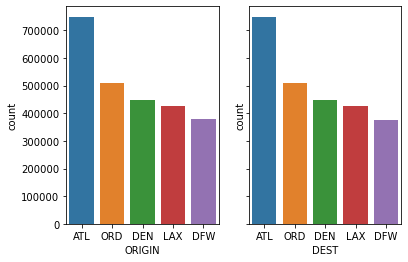

In [66]:
#Most frequent origin airports
freq_orig = flights_na['ORIGIN'].value_counts()[:5]
freq_dest = flights_na['DEST'].value_counts()[:5]
#print(freq_orig)
#print(freq_dest)
fig,ax = plt.subplots(1,2, sharey='row')
sns.countplot(x = 'ORIGIN', data = flights_na[flights_na['ORIGIN'].isin(freq_orig.keys().tolist())], order = freq_orig.index, ax = ax[0])
sns.countplot(x = 'DEST', data = flights_na[flights_na['DEST'].isin(freq_dest.keys().tolist())], order = freq_dest.index, ax = ax[1])

In [67]:
atl_flights = flights_na[flights_na['DEST'] == 'ATL']
atl_flights

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 28
140,2016-01-01,WN,N550WN,3211,AUS,ATL,610,609.0,-1.0,10.0,...,130.0,116.0,94.0,813.0,NaN,NaN,NaN,NaN,NaN,NaN
141,2016-01-01,WN,N739GB,3277,AUS,ATL,1905,1919.0,14.0,9.0,...,120.0,109.0,94.0,813.0,NaN,NaN,NaN,NaN,NaN,NaN
279,2016-01-01,WN,N405WN,782,BWI,ATL,1910,1933.0,23.0,14.0,...,125.0,115.0,92.0,577.0,NaN,NaN,NaN,NaN,NaN,NaN
280,2016-01-01,WN,N638SW,866,BWI,ATL,2020,2024.0,4.0,15.0,...,120.0,127.0,102.0,577.0,NaN,NaN,NaN,NaN,NaN,NaN
281,2016-01-01,WN,N239WN,1856,BWI,ATL,1210,1231.0,21.0,9.0,...,120.0,113.0,98.0,577.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292045,2017-12-31,DL,N774DE,2898,CVG,ATL,1237,1232.0,-5.0,12.0,...,103.0,92.0,73.0,373.0,NaN,NaN,NaN,NaN,NaN,NaN
11292046,2017-12-31,DL,N775DE,2901,CVG,ATL,1110,1102.0,-8.0,10.0,...,96.0,86.0,69.0,373.0,NaN,NaN,NaN,NaN,NaN,NaN
11292050,2017-12-31,DL,N950AT,2910,AVP,ATL,600,606.0,6.0,11.0,...,153.0,141.0,123.0,714.0,NaN,NaN,NaN,NaN,NaN,NaN
11292052,2017-12-31,DL,N391DA,2927,SMF,ATL,2325,2323.0,-2.0,13.0,...,264.0,240.0,221.0,2092.0,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
atl_flights = atl_flights.drop(columns=["OP_UNIQUE_CARRIER", "OP_CARRIER_FL_NUM", "DEST", "CANCELLED", "CANCELLATION_CODE", "DIVERTED","CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY", "Unnamed: 28", "WHEELS_ON", "WHEELS_OFF", "TAXI_IN", "AIR_TIME","DEP_TIME","ACTUAL_ELAPSED_TIME"])
atl_flights

,FL_DATE,TAIL_NUM,ORIGIN,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
140,2016-01-01,N550WN,AUS,610,-1.0,10.0,920,905.0,-15.0,130.0,813.0
141,2016-01-01,N739GB,AUS,1905,14.0,9.0,2205,2208.0,3.0,120.0,813.0
279,2016-01-01,N405WN,BWI,1910,23.0,14.0,2115,2128.0,13.0,125.0,577.0
280,2016-01-01,N638SW,BWI,2020,4.0,15.0,2220,2231.0,11.0,120.0,577.0
281,2016-01-01,N239WN,BWI,1210,21.0,9.0,1410,1424.0,14.0,120.0,577.0
...,...,...,...,...,...,...,...,...,...,...,...
11292045,2017-12-31,N774DE,CVG,1237,-5.0,12.0,1420,1404.0,-16.0,103.0,373.0
11292046,2017-12-31,N775DE,CVG,1110,-8.0,10.0,1246,1228.0,-18.0,96.0,373.0
11292050,2017-12-31,N950AT,AVP,600,6.0,11.0,833,827.0,-6.0,153.0,714.0
11292052,2017-12-31,N391DA,SMF,2325,-2.0,13.0,649,623.0,-26.0,264.0,2092.0


<AxesSubplot:xlabel='ORIGIN', ylabel='count'>

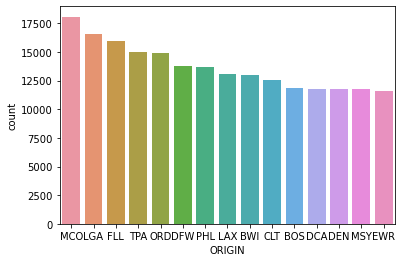

In [69]:
freq_orig = atl_flights['ORIGIN'].value_counts()[:15]
fig,ax = plt.subplots()
sns.countplot(x = 'ORIGIN', data = atl_flights[atl_flights['ORIGIN'].isin(freq_orig.keys().tolist())], order = freq_orig.index, ax = ax)

<AxesSubplot:xlabel='ORIGIN', ylabel='ARR_DELAY'>

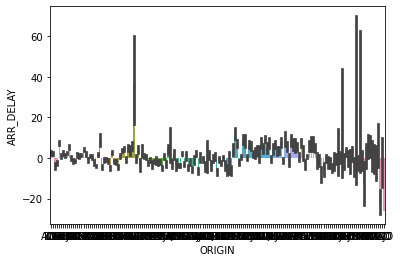

In [70]:
fig,ax = plt.subplots()
sns.barplot(x="ORIGIN", y="ARR_DELAY", data=atl_flights, ax = ax)

In [71]:
#Loading airports data
airports_df = pd.read_csv("data_raw/airports.csv", on_bad_lines='warn')
print("="*20 + "AIRPORTS DESCRIBE" + "="*20)
print(airports_df.describe())
print("="*20 + "AIRPORTS INFO" + "="*20)
print(airports_df.info())
print("="*20 + "AIRPORTS HEAD" + "="*20)
print(airports_df[~airports_df.isna().any(axis=1)].head())
print("="*20 + "AIRPORTS STATS" + "="*20)
if PRINT_STAT_COLS:
    print(col_stats_to_string(airports_df))

====================AIRPORTS DESCRIBE====================
                  id  latitude_deg  longitude_deg  elevation_ft
count   55485.000000  55485.000000   55485.000000  48458.000000
mean    85532.585113     25.726149     -35.275926   1246.230364
std    121971.928190     27.216164      79.531670   1608.472867
min         2.000000    -90.000000    -179.876999  -1266.000000
25%     13997.000000      8.251650     -92.056801    206.000000
50%     27996.000000     36.501288     -72.068100    720.000000
75%     44483.000000     43.794734      14.615308   1500.000000
max    332461.000000     82.750000     179.975700  22000.000000
====================AIRPORTS INFO====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55485 entries, 0 to 55484
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 55485 non-null  int64  
 1   ident              55485 non-null  object 
 2   type  

In [72]:
na_airports_df = airports_df.drop(columns = ["continent", "iso_country","wikipedia_link", "home_link", "keywords"])
na_airports_df

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,US-PA,Bensalem,no,00A,NaN,00A
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,US-KS,Leoti,no,00AA,NaN,00AA
2,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,US-AK,Anchor Point,no,00AK,NaN,00AK
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,US-AL,Harvest,no,00AL,NaN,00AL
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,US-AR,Newport,no,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55480,317861,ZYYK,medium_airport,Yingkou Lanqi Airport,40.542524,122.358600,0.0,CN-21,Yingkou,yes,ZYYK,YKH,NaN
55481,32753,ZYYY,medium_airport,Shenyang Dongta Airport,41.784401,123.496002,NaN,CN-21,Shenyang,no,ZYYY,NaN,NaN
55482,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,GB-ENG,Sealand,no,NaN,NaN,NaN
55483,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,TF-U-A,Grande Glorieuse,no,NaN,NaN,NaN


In [73]:
atl_port = na_airports_df[na_airports_df['ident'] == 'KATL']
atl_port

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code
26344,3384,KATL,large_airport,Hartsfield Jackson Atlanta International Airport,33.6367,-84.428101,1026.0,US-GA,Atlanta,yes,KATL,ATL,ATL


In [74]:
#Loading runways data
runways_df = pd.read_csv("data_raw/runways.csv",encoding='latin-1', on_bad_lines='warn')
print("="*20 + "RUNWAYS DESCRIBE" + "="*20)
print(runways_df.describe())
print("="*20 + "RUNWAYS HEAD" + "="*20)
print(runways_df.head())
print("="*20 + "RUNWAYS INFO" + "="*20)
print(runways_df.info())

====================RUNWAYS DESCRIBE====================
                  id    airport_ref      length_ft      width_ft  \
count   41383.000000   41383.000000   41193.000000  38728.000000   
mean   256849.131745   32683.987169    3264.063846    110.638091   
std     20566.421018   65148.247698    2735.417166    232.403520   
min    232758.000000       2.000000       0.000000      0.000000   
25%    243114.500000    8479.500000    1700.000000     59.000000   
50%    253465.000000   18595.000000    2750.000000     75.000000   
75%    263823.500000   27243.500000    4250.000000    100.000000   
max    332459.000000  332458.000000  120000.000000   9000.000000   

            lighted        closed  le_latitude_deg  le_longitude_deg  \
count  41383.000000  41383.000000     1.439700e+04      14394.000000   
mean       0.261339      0.014644     7.258186e+02        -40.376565   
std        0.439370      0.120123     8.334176e+04         79.858304   
min        0.000000      0.000000    -7.55

In [75]:
atl_runways = runways_df[runways_df['airport_ident'] == 'KATL']
atl_runways = atl_runways.drop(columns=['airport_ref', 'airport_ident','le_displaced_threshold_ft','Unnamed: 20', 'he_displaced_threshold_ft', 'id'])
atl_runways

,length_ft,width_ft,surface,lighted,closed,le_ident,le_latitude_deg,le_longitude_deg,le_elevation_ft,le_heading_degT,he_ident,he_latitude_deg,he_longitude_deg,he_elevation_ft,he_heading_degT
19575,9000.0,150.0,CON,1,0,08L,33.6495,-84.4390,1015.0,90.0,26R,33.6495,-84.4095,990.0,270.0
19576,10000.0,150.0,CON,1,0,08R,33.6468,-84.4384,1024.0,90.0,26L,33.6468,-84.4055,995.0,270.0
19577,11890.0,150.0,CON,1,0,09L,33.6347,-84.4480,1019.0,90.0,27R,33.6347,-84.4089,978.0,270.0
19578,9001.0,150.0,CON,1,0,09R,33.6318,-84.4480,1026.0,90.0,27L,33.6318,-84.4184,985.0,270.0
19579,9000.0,150.0,CON,1,0,10,33.6203,-84.4479,1000.0,90.0,28,33.6203,-84.4183,998.0,270.0


# Aircraft Data

## Introduction
Aircraft data was gathered by checking all occurring tail numbers in the flights data table by web scraping the following site. __[https://www.airfleets.net/recherche?key='tail_number'](https://www.airfleets.net/recherche/)__
With that I could combine my flight data with the aircrafts which are included in the flights data. Some values were still missing and had to be checked by hand.


In [76]:
#Loading aircrafts data
aircrafts_df = pd.read_csv("data_raw/all_aircrafts_FAA.csv",encoding='latin-1', on_bad_lines='warn', sep=";")
print("="*20 + "AIRCRAFTS DESCRIBE" + "="*20)
print(aircrafts_df.describe())
print("="*20 + "AIRCRAFTS PRINT" + "="*20)
print(aircrafts_df.head())
print("=" * 20 + "AIRCRAFTS INFO" + "=" * 20)
aircrafts_df.info()

====================AIRCRAFTS DESCRIBE====================
       Date Completed Manufacturer   Model Physical Class (Engine) Engines  \
count             873         2764    2764                    2764    2764   
unique             72          424    2559                       8       6   
top               tbd       Boeing  BK-117                     tbd     tbd   
freq              163          113       5                    1831    1956   

             AAC       ADG   TDG Approach Speed(Vref) Wingtip Configuration  \
count       2764      2764  2762                  853                  2764   
unique         6         8    10                  113                    21   
top     No Value  No Value   tbd                  140                   tbd   
freq        1911      1899  2036                   41                  2023   

        ... MGW(Outer to Outer)  MTOW Max RampMax Taxi Main Gear Config  \
count   ...                2764  2764             2764             2764   
uniq

In [77]:
all_planes_df = read_pickle_from_subfolder("pickle/*.pkl")
all_planes_df = all_planes_df.rename(columns = {'Regist.':'TAIL_NUM'})
drop_idx = all_planes_df.sort_values(by=["TAIL_NUM","Status"])[all_planes_df[["TAIL_NUM", "Status"]].duplicated(subset="TAIL_NUM", keep=False)].groupby("TAIL_NUM", group_keys=False).apply(lambda x: x.loc[x.Status != "Active"]).index
all_planes_df = all_planes_df.drop(labels= drop_idx, axis="index")
all_planes_df = all_planes_df[~all_planes_df.duplicated(subset="TAIL_NUM", keep="first")]
all_planes_df

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Aircraft,TAIL_NUM,MSN,Airline,Status
0,Canadair Regional Jet,N925EV,7831,SkyWest USAAtlantic Southeast AirlinesExpressjet,Active
1,Canadair Regional Jet,N856AS,7404,SkyWest USAAtlantic Southeast AirlinesExpressjet,Active
2,Canadair Regional Jet,N861AS,7445,SkyWest USAAtlantic Southeast AirlinesExpressjet,Stored
3,Canadair Regional Jet,N858AS,7417,Atlantic Southeast AirlinesExpressjet,On order
4,Canadair Regional Jet,N855AS,7395,Atlantic Southeast AirlinesExpressjetSkyWest USA,Stored
...,...,...,...,...,...
3323,Boeing 737,N624SW,27934,Southwest Airlines,Scrapped
3324,Boeing 737,N394SW,27380,Southwest Airlines,Stored
3325,Airbus A319,N342NB,1746,Delta Air LinesNorthwest Airlines,Active
3326,Boeing 737,N626SW,27702,iAero AirwaysSouthwest AirlinesSwift Air,Active


In [78]:
print(atl_flights.shape)
print(all_planes_df.shape)

(748848, 11)
(3267, 5)


In [79]:
atl_flights_df = pd.merge(atl_flights,all_planes_df[["TAIL_NUM","Aircraft"]], how="inner", on="TAIL_NUM")

In [80]:
atl_flights_df["Aircraft"]

0         Boeing 737 NG / Max
1         Boeing 737 NG / Max
2         Boeing 737 NG / Max
3         Boeing 737 NG / Max
4         Boeing 737 NG / Max
                 ...         
731139            Airbus A320
731140            Airbus A320
731141            Airbus A320
731142            Airbus A320
731143            Airbus A320
Name: Aircraft, Length: 731144, dtype: object

In [81]:
aircrafts_df[aircrafts_df["Manufacturer"] == "Boeing"]

,Date Completed,Manufacturer,Model,Physical Class (Engine),Engines,AAC,ADG,TDG,Approach Speed(Vref),Wingtip Configuration,...,MGW(Outer to Outer),MTOW,Max RampMax Taxi,Main Gear Config,ICAO Code,Wake Category,ATCT Weight Class,Years Manufactured,Note,"Parking Area (WS x Length), sf"
469,NaN,Boeing,720,tbd,tbd,No Value,No Value,tbd,NaN,tbd,...,tbd,tbd,tbd,tbd,B720,M,tbd,tbd,tbd,#WERT!
470,NaN,Boeing,314A Clipper,Piston,4,No Value,No Value,tbd,NaN,tbd,...,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,#WERT!
471,NaN,Boeing,707-020,tbd,tbd,No Value,No Value,tbd,NaN,tbd,...,tbd,tbd,tbd,tbd,tbd,M,tbd,tbd,tbd,#WERT!
472,NaN,Boeing,707-120B,Jet,4,No Value,No Value,tbd,NaN,tbd,...,tbd,tbd,tbd,tbd,B701,tbd,tbd,tbd,tbd,#WERT!
473,NaN,Boeing,707-320/420,Jet,4,No Value,No Value,tbd,NaN,tbd,...,tbd,tbd,tbd,tbd,B703,H,tbd,tbd,tbd,#WERT!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,NaN,Boeing,PT-18 Kaydet (Stearman),Piston,1,No Value,No Value,tbd,NaN,tbd,...,tbd,tbd,tbd,S,ST75,L,Small Eqpt,tbd,tbd,#WERT!
578,NaN,Boeing,PT-27 Kaydet (Stearman),Piston,1,No Value,No Value,tbd,NaN,tbd,...,tbd,tbd,tbd,S,ST75,L,Small Eqpt,tbd,tbd,#WERT!
579,NaN,Boeing,Raptor F22,tbd,tbd,No Value,No Value,tbd,NaN,tbd,...,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,#WERT!
580,NaN,Boeing,RC-135,tbd,tbd,No Value,No Value,tbd,NaN,tbd,...,tbd,tbd,tbd,tbd,R135,H,tbd,tbd,tbd,#WERT!


In [82]:
atl_flights_df["Aircraft"].unique()

array(['Boeing 737 NG / Max', 'Boeing 737', 'Airbus A320', 'Airbus A321',
       'Airbus A319', 'Canadair Regional Jet', 'Embraer 170/175',
       'Boeing 757', 'McDonnell Douglas MD-80/90', 'Boeing 717',
       'Boeing 767', 'Embraer 190/195', 'Airbus A330', 'Embraer 135/145',
       'Boeing 777', 'Airbus A300', 'ATR 42/72',
       'McDonnell Douglas DC-10', 'Boeing 787', 'Boeing 747'],
      dtype=object)

In [83]:
pd.DataFrame(atl_flights_df["Aircraft"].unique())[0].str.extract('([a-zA-Z]+.*.+\d.*)', expand=True)

,0
0,Boeing 737 NG / Max
1,Boeing 737
2,Airbus A320
3,Airbus A321
4,Airbus A319
5,NaN
6,Embraer 170/175
7,Boeing 757
8,McDonnell Douglas MD-80/90
9,Boeing 717


In [84]:
#aircraft_split = atl_flights_df["Aircraft"].str.extract('([a-zA-Z]+.*.+\d.*)', expand=True)
aircraft_split = pd.DataFrame(atl_flights_df["Aircraft"].copy())
aircraft_split.rename(columns={"Aircraft" : "Model"}, inplace=True)
aircraft_split["Model"].unique()

array(['Boeing 737 NG / Max', 'Boeing 737', 'Airbus A320', 'Airbus A321',
       'Airbus A319', 'Canadair Regional Jet', 'Embraer 170/175',
       'Boeing 757', 'McDonnell Douglas MD-80/90', 'Boeing 717',
       'Boeing 767', 'Embraer 190/195', 'Airbus A330', 'Embraer 135/145',
       'Boeing 777', 'Airbus A300', 'ATR 42/72',
       'McDonnell Douglas DC-10', 'Boeing 787', 'Boeing 747'],
      dtype=object)

In [85]:
aircraft_split.loc[aircraft_split["Model"] == "Canadair Regional Jet"] = "Bombardier Canadair Regional Jet"
aircraft_split["Model"].unique()

array(['Boeing 737 NG / Max', 'Boeing 737', 'Airbus A320', 'Airbus A321',
       'Airbus A319', 'Bombardier Canadair Regional Jet',
       'Embraer 170/175', 'Boeing 757', 'McDonnell Douglas MD-80/90',
       'Boeing 717', 'Boeing 767', 'Embraer 190/195', 'Airbus A330',
       'Embraer 135/145', 'Boeing 777', 'Airbus A300', 'ATR 42/72',
       'McDonnell Douglas DC-10', 'Boeing 787', 'Boeing 747'],
      dtype=object)

In [86]:
aircraft_split.shape

(731144, 1)

In [87]:
data = []
row = []
row_list = [255,143,151,154,159,164,475,487,500,514,527,532,542,549,683,1129,1099,1108,583, 1803]
name_list = ["Model_"]
for col_name in aircrafts_df.columns:
    name_list.append(col_name)
for count, entry in enumerate(aircraft_split["Model"].sort_values().unique()):
    row = []
    row.append(entry)
    for c, i in enumerate(aircrafts_df.loc[row_list[count]]):
        row.append(i)
    data.append(row)
aircrafts_atl_df = pd.DataFrame(data, columns=name_list)
aircrafts_atl_df = aircrafts_atl_df.drop(["Note","Years Manufactured","Manufacturer","Model", "Date Completed"], axis="columns")
aircrafts_atl_df.rename(columns={"Model_":"Model"}, inplace=True)
aircrafts_atl_df

,Model,Physical Class (Engine),Engines,AAC,ADG,TDG,Approach Speed(Vref),Wingtip Configuration,"Wingspan, ft","Length, ft",...,"Wheelbase, ft",Cockpit to Main Gear (CMG),MGW(Outer to Outer),MTOW,Max RampMax Taxi,Main Gear Config,ICAO Code,Wake Category,ATCT Weight Class,"Parking Area (WS x Length), sf"
0,ATR 42/72,Turboprop,2,B,III,1B or 2,114,no winglets,"88,75","89,13",...,"35,33","35,33","> 13' 5"" (16' per Appx 1)",49 603,49 978,D,AT72,M,tbd,7 910
1,Airbus A300,Jet,2,C,IV,5,137,wingtip fences,"147,14","177,43",...,"61,03","75,00","36,00",363 760,365 740,2D,A306,H,Heavy Eqpt,26 107
2,Airbus A319,Jet,2,C,III,3,126,wingtip fences,"111,88","111,02",...,"36,23","44,90","29,36",168 653,169 535,D,A319,M,Large Jet Eqpt,12 421
3,Airbus A320,Jet,2,C,III,3,136,wingtip fences,"111,88","123,27",...,"41,47","50,20","29,36",171 961,172 842,D,A320,M,Large Jet Eqpt,13 791
4,Airbus A321,Jet,2,C,III,3,140,wingtip fences,"111,88","146,03",...,"55,45","44,95","29,43",206 132,207 014,D,A321,M,Large Jet Eqpt,16 338
5,Airbus A330,Jet,2,C,V,5,137,winglets,"197,83","208,99",...,"83,27","97,28","41,37",533 519,535 503,2D,A333,H,Heavy Eqpt,41 344
6,Boeing 717,Jet,2,C,III,2,139,no winglets,"93,33","124,00",...,"57,75","57,75","19,43",118 000,119 000,D,B712,M,tbd,11 573
7,Boeing 737,Jet,2,C,III,3,129,no winglets,"93,00","100,17",...,"37,33","42,58","20,88",115 500,116 000,D,B732,M,Large Jet Eqpt,9 316
8,Boeing 737 NG / Max,Jet,2,D,III,3,141,no winglets,"112,58","138,17",...,"56,33","61,58","22,96",174 200,174 700,D,B739,M,Large Jet Eqpt,15 555
9,Boeing 747,Jet,4,D,V,5,157,winglets,"195,67","231,85",...,"84,00","91,67","41,33",610 000,613 500,2D/2D2,B744,H,tbd,45 366


# METAR DATA

## Introduction
Metar stands for "Meteorological Terminal Air Report" and is therefore a documentation of meteorological data concerning specific airports.
Data was gathered from the Iowa ASOS network from the following link: __[https://mesonet.agron.iastate.edu/request/download.phtml](https://mesonet.agron.iastate.edu/request/download.phtml)__

For the codes within metar data we used __[https://www.theairlinepilots.com/forumarchive/aviation-weather/metar.pdf](https://www.theairlinepilots.com/forumarchive/aviation-weather/metar.pdf)__ to interpret their meanings

There have been found 193.033 entries with 31 columns.
## Dropped
For this project I dropped columns which are referring to the airport and are therefore equal in all rows.
- station (Abbreviation of airport - redundant)
- lon (longitude - airport longitude is known)
- lat (latitude - airport latitude is known)
- metar (unsure of use)

Additionally, valid was split up into time and date

## Missing and Trace values
Missing values are marked with M and trace values with T.
I replace missing and trace values (there were so few that this was deemed okay) values with pd.NaN to better use the functions provided by pandas/numpy


In [88]:
read_table_from_subfolder("./data_raw/METAR_US/*_KATL_*.txt")

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


,station,valid,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,...,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar
0,ATL,2016-01-01 00:52,-84.4418,33.6301,51.98,42.08,68.86,320.00,10.00,0.00,...,25000.00,M,M,M,M,M,M,M,51.98,KATL 010052Z 32010KT 10SM FEW100 SCT150 BKN200...
1,ATL,2016-01-01 01:52,-84.4418,33.6301,50.00,41.00,71.07,330.00,7.00,0.00,...,M,M,M,M,M,M,M,M,46.72,KATL 010152Z 33007KT 10SM SCT150 BKN200 BKN250...
2,ATL,2016-01-01 02:52,-84.4418,33.6301,48.92,41.00,73.99,310.00,12.00,0.00,...,M,M,M,M,M,M,M,M,43.54,KATL 010252Z 31012KT 10SM FEW150 BKN200 BKN250...
3,ATL,2016-01-01 03:52,-84.4418,33.6301,46.94,39.92,76.43,320.00,13.00,0.00,...,M,M,M,M,M,M,M,M,40.71,KATL 010352Z 32013KT 10SM FEW150 SCT200 BKN250...
4,ATL,2016-01-01 04:52,-84.4418,33.6301,46.04,39.02,76.35,320.00,10.00,0.00,...,M,M,M,M,M,M,M,M,40.57,KATL 010452Z 32010KT 10SM FEW150 BKN200 BKN250...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193028,ATL,2017-12-30 23:40,-84.4418,33.6301,M,M,M,350.00,8.00,M,...,M,M,M,M,M,M,M,M,M,KATL 302340Z AUTO 35008KT 10SM 07/M01 A3008 RM...
193029,ATL,2017-12-30 23:45,-84.4418,33.6301,M,M,M,360.00,10.00,M,...,M,M,M,M,M,M,M,M,M,KATL 302345Z AUTO 36010KT 10SM 07/M01 A3008 RM...
193030,ATL,2017-12-30 23:50,-84.4418,33.6301,M,M,M,330.00,10.00,M,...,M,M,M,M,M,M,M,M,M,KATL 302350Z AUTO 33010KT 10SM 07/M01 A3009 RM...
193031,ATL,2017-12-30 23:52,-84.4418,33.6301,44.10,30.00,57.37,340.00,9.00,0.00,...,M,M,M,M,M,M,M,M,38.56,KATL 302352Z 34009KT 10SM FEW200 BKN250 07/M01...


In [89]:
atl_weather_df = read_table_from_subfolder("./data_raw/METAR_US/*_KATL_*.txt")
date = atl_weather_df["valid"].apply(lambda x: x.split()[0])
time = atl_weather_df["valid"].apply(lambda x: x.split()[1])
atl_weather_df = atl_weather_df.drop(labels=["station","lon", "lat","valid"], axis="columns")
atl_weather_df["date"] = date
atl_weather_df["time"] = time
atl_weather_df = atl_weather_df.mask(atl_weather_df == "M")
#atl_weather_df["valid"] = atl_weather_df["valid"].apply(lambda x: re.match('\d\d\d\d-\d\d-\d\d',x).group(0))
atl_weather_df

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,...,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,date,time
0,51.98,42.08,68.86,320.00,10.00,0.00,30.19,1022.50,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,51.98,KATL 010052Z 32010KT 10SM FEW100 SCT150 BKN200...,2016-01-01,00:52
1,50.00,41.00,71.07,330.00,7.00,0.00,30.18,1022.20,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,46.72,KATL 010152Z 33007KT 10SM SCT150 BKN200 BKN250...,2016-01-01,01:52
2,48.92,41.00,73.99,310.00,12.00,0.00,30.18,1022.00,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,43.54,KATL 010252Z 31012KT 10SM FEW150 BKN200 BKN250...,2016-01-01,02:52
3,46.94,39.92,76.43,320.00,13.00,0.00,30.17,1021.90,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.71,KATL 010352Z 32013KT 10SM FEW150 SCT200 BKN250...,2016-01-01,03:52
4,46.04,39.02,76.35,320.00,10.00,0.00,30.18,1022.00,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.57,KATL 010452Z 32010KT 10SM FEW150 BKN200 BKN250...,2016-01-01,04:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193028,NaN,NaN,NaN,350.00,8.00,NaN,30.08,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KATL 302340Z AUTO 35008KT 10SM 07/M01 A3008 RM...,2017-12-30,23:40
193029,NaN,NaN,NaN,360.00,10.00,NaN,30.08,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KATL 302345Z AUTO 36010KT 10SM 07/M01 A3008 RM...,2017-12-30,23:45
193030,NaN,NaN,NaN,330.00,10.00,NaN,30.09,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KATL 302350Z AUTO 33010KT 10SM 07/M01 A3009 RM...,2017-12-30,23:50
193031,44.10,30.00,57.37,340.00,9.00,0.00,30.09,1019.50,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,38.56,KATL 302352Z 34009KT 10SM FEW200 BKN250 07/M01...,2017-12-30,23:52


In [90]:
print("Counting 'T' values per column")
for col in atl_weather_df.columns:
    val_cnt = atl_weather_df[col].value_counts()
    if 'T' in val_cnt.index:
        print(col + ":\t"+ str(val_cnt.loc["T"]))
    else:
        print(col + ":\t0")

Counting 'T' values per column
tmpf:	0
dwpf:	0
relh:	0
drct:	0
sknt:	0
p01i:	1854
alti:	0
mslp:	0
vsby:	0
gust:	0
skyc1:	0
skyc2:	0
skyc3:	0
skyc4:	0
skyl1:	0
skyl2:	0
skyl3:	0
skyl4:	0
wxcodes:	0
ice_accretion_1hr:	11
ice_accretion_3hr:	2
ice_accretion_6hr:	2
peak_wind_gust:	0
peak_wind_drct:	0
peak_wind_time:	0
feel:	0
metar:	0
date:	0
time:	0


In [91]:
atl_weather_df = atl_weather_df.mask(atl_weather_df == "T")
atl_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193033 entries, 0 to 193032
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tmpf               20396 non-null   object 
 1   dwpf               20394 non-null   object 
 2   relh               20364 non-null   object 
 3   drct               187633 non-null  object 
 4   sknt               188154 non-null  object 
 5   p01i               24463 non-null   object 
 6   alti               193002 non-null  object 
 7   mslp               17489 non-null   object 
 8   vsby               193033 non-null  float64
 9   gust               5243 non-null    object 
 10  skyc1              185389 non-null  object 
 11  skyc2              46189 non-null   object 
 12  skyc3              20988 non-null   object 
 13  skyc4              1877 non-null    object 
 14  skyl1              96341 non-null   object 
 15  skyl2              46189 non-null   object 
 16  sk

In [92]:
#atl_weather_df = num_df.join(str_df)
atl_weather_df

,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,...,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,date,time
0,51.98,42.08,68.86,320.00,10.00,0.00,30.19,1022.50,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,51.98,KATL 010052Z 32010KT 10SM FEW100 SCT150 BKN200...,2016-01-01,00:52
1,50.00,41.00,71.07,330.00,7.00,0.00,30.18,1022.20,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,46.72,KATL 010152Z 33007KT 10SM SCT150 BKN200 BKN250...,2016-01-01,01:52
2,48.92,41.00,73.99,310.00,12.00,0.00,30.18,1022.00,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,43.54,KATL 010252Z 31012KT 10SM FEW150 BKN200 BKN250...,2016-01-01,02:52
3,46.94,39.92,76.43,320.00,13.00,0.00,30.17,1021.90,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.71,KATL 010352Z 32013KT 10SM FEW150 SCT200 BKN250...,2016-01-01,03:52
4,46.04,39.02,76.35,320.00,10.00,0.00,30.18,1022.00,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.57,KATL 010452Z 32010KT 10SM FEW150 BKN200 BKN250...,2016-01-01,04:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193028,NaN,NaN,NaN,350.00,8.00,NaN,30.08,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KATL 302340Z AUTO 35008KT 10SM 07/M01 A3008 RM...,2017-12-30,23:40
193029,NaN,NaN,NaN,360.00,10.00,NaN,30.08,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KATL 302345Z AUTO 36010KT 10SM 07/M01 A3008 RM...,2017-12-30,23:45
193030,NaN,NaN,NaN,330.00,10.00,NaN,30.09,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KATL 302350Z AUTO 33010KT 10SM 07/M01 A3009 RM...,2017-12-30,23:50
193031,44.10,30.00,57.37,340.00,9.00,0.00,30.09,1019.50,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,38.56,KATL 302352Z 34009KT 10SM FEW200 BKN250 07/M01...,2017-12-30,23:52


In [93]:
def print_inv_nan_perc(df):
    print("Counting non-null percentage per column")
    for col in df.columns:
        perc = round(1 - (df[col].isna().sum() / df.__len__()),2)
        print(col + ":\t" + str(perc))
print_inv_nan_perc(atl_weather_df)

Counting non-null percentage per column
tmpf:	0.11
dwpf:	0.11
relh:	0.11
drct:	0.97
sknt:	0.97
p01i:	0.13
alti:	1.0
mslp:	0.09
vsby:	1.0
gust:	0.03
skyc1:	0.96
skyc2:	0.24
skyc3:	0.11
skyc4:	0.01
skyl1:	0.5
skyl2:	0.24
skyl3:	0.11
skyl4:	0.01
wxcodes:	0.09
ice_accretion_1hr:	0.0
ice_accretion_3hr:	0.0
ice_accretion_6hr:	0.0
peak_wind_gust:	0.0
peak_wind_drct:	0.0
peak_wind_time:	0.0
feel:	0.11
metar:	0.99
date:	1.0
time:	1.0


In [94]:
#Dropping all columns with missing metar data
atl_weather_df = atl_weather_df.drop(atl_weather_df[atl_weather_df["metar"].isnull()].index)
atl_weather_df

,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,...,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,date,time
0,51.98,42.08,68.86,320.00,10.00,0.00,30.19,1022.50,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,51.98,KATL 010052Z 32010KT 10SM FEW100 SCT150 BKN200...,2016-01-01,00:52
1,50.00,41.00,71.07,330.00,7.00,0.00,30.18,1022.20,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,46.72,KATL 010152Z 33007KT 10SM SCT150 BKN200 BKN250...,2016-01-01,01:52
2,48.92,41.00,73.99,310.00,12.00,0.00,30.18,1022.00,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,43.54,KATL 010252Z 31012KT 10SM FEW150 BKN200 BKN250...,2016-01-01,02:52
3,46.94,39.92,76.43,320.00,13.00,0.00,30.17,1021.90,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.71,KATL 010352Z 32013KT 10SM FEW150 SCT200 BKN250...,2016-01-01,03:52
4,46.04,39.02,76.35,320.00,10.00,0.00,30.18,1022.00,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.57,KATL 010452Z 32010KT 10SM FEW150 BKN200 BKN250...,2016-01-01,04:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193028,NaN,NaN,NaN,350.00,8.00,NaN,30.08,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KATL 302340Z AUTO 35008KT 10SM 07/M01 A3008 RM...,2017-12-30,23:40
193029,NaN,NaN,NaN,360.00,10.00,NaN,30.08,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KATL 302345Z AUTO 36010KT 10SM 07/M01 A3008 RM...,2017-12-30,23:45
193030,NaN,NaN,NaN,330.00,10.00,NaN,30.09,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KATL 302350Z AUTO 33010KT 10SM 07/M01 A3009 RM...,2017-12-30,23:50
193031,44.10,30.00,57.37,340.00,9.00,0.00,30.09,1019.50,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,38.56,KATL 302352Z 34009KT 10SM FEW200 BKN250 07/M01...,2017-12-30,23:52


In [95]:
metar_dict = {
    'TS' : 'Thunderstorm',
    'RA' : 'Rain',
    'DZ' : 'Drizzle',
    'SN' : 'Snow',
    'SG' : 'Snow Grains',
    'IC' : 'Ice Pellets',
    'GR' : 'Hail',
    'GS' : 'Small Hail',
    'FG' : 'FG',
    'VA' : 'Volcanic Ashe',
    'BR' : 'Mist',
    'HZ' : 'Haze',
    'DU' : 'Dust',
    'FU' : 'Smoke',
    'SA' : 'Sand',
    'PY' : 'Spray'
}

In [96]:
def find_event(metar: str):
    ret = []
    for event in [ele for ele in list(metar_dict.keys()) if(ele in metar)]:
        pos = str.find(metar, event)
        if metar[pos - 1] == "-" or metar[pos - 1] == "+":
            ret.append(metar[pos-1] + event)
        else:
            ret.append(event)
    if len(ret) > 0:
        return ret
    else:
        return np.nan

atl_weather_df["events"] = atl_weather_df["metar"].apply(lambda x: find_event(x))
print("Length of events: " + str(len(atl_weather_df[~atl_weather_df["events"].isna()])) + ". From " +str(len(atl_weather_df)) + " total entries.")
atl_weather_df["events"][~atl_weather_df["events"].isna()].value_counts()

Length of events: 27140. From 191331 total entries.


TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[SN]                     6209
[-RA]                    4123
[BR]                     3683
[-RA, BR]                2154
[-DZ, BR]                1296
                         ... 
[-TS, RA, BR]               1
[+TS, RA, SN, IC, FG]       1
[RA, FU]                    1
[SN, FG]                    1
[DZ, FG, BR]                1
Name: events, Length: 122, dtype: int64

In [97]:
atl_weather_df

,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,...,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,date,time,events
0,51.98,42.08,68.86,320.00,10.00,0.00,30.19,1022.50,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,51.98,KATL 010052Z 32010KT 10SM FEW100 SCT150 BKN200...,2016-01-01,00:52,NaN
1,50.00,41.00,71.07,330.00,7.00,0.00,30.18,1022.20,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,46.72,KATL 010152Z 33007KT 10SM SCT150 BKN200 BKN250...,2016-01-01,01:52,NaN
2,48.92,41.00,73.99,310.00,12.00,0.00,30.18,1022.00,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,43.54,KATL 010252Z 31012KT 10SM FEW150 BKN200 BKN250...,2016-01-01,02:52,NaN
3,46.94,39.92,76.43,320.00,13.00,0.00,30.17,1021.90,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,40.71,KATL 010352Z 32013KT 10SM FEW150 SCT200 BKN250...,2016-01-01,03:52,NaN
4,46.04,39.02,76.35,320.00,10.00,0.00,30.18,1022.00,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,40.57,KATL 010452Z 32010KT 10SM FEW150 BKN200 BKN250...,2016-01-01,04:52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193028,NaN,NaN,NaN,350.00,8.00,NaN,30.08,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,KATL 302340Z AUTO 35008KT 10SM 07/M01 A3008 RM...,2017-12-30,23:40,NaN
193029,NaN,NaN,NaN,360.00,10.00,NaN,30.08,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,KATL 302345Z AUTO 36010KT 10SM 07/M01 A3008 RM...,2017-12-30,23:45,NaN
193030,NaN,NaN,NaN,330.00,10.00,NaN,30.09,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,KATL 302350Z AUTO 33010KT 10SM 07/M01 A3009 RM...,2017-12-30,23:50,NaN
193031,44.10,30.00,57.37,340.00,9.00,0.00,30.09,1019.50,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,38.56,KATL 302352Z 34009KT 10SM FEW200 BKN250 07/M01...,2017-12-30,23:52,NaN


In [98]:
print_inv_nan_perc(atl_weather_df)

Counting non-null percentage per column
tmpf:	0.11
dwpf:	0.11
relh:	0.11
drct:	0.97
sknt:	0.97
p01i:	0.13
alti:	1.0
mslp:	0.09
vsby:	1.0
gust:	0.03
skyc1:	0.96
skyc2:	0.24
skyc3:	0.11
skyc4:	0.01
skyl1:	0.5
skyl2:	0.24
skyl3:	0.11
skyl4:	0.01
wxcodes:	0.09
ice_accretion_1hr:	0.0
ice_accretion_3hr:	0.0
ice_accretion_6hr:	0.0
peak_wind_gust:	0.0
peak_wind_drct:	0.0
peak_wind_time:	0.0
feel:	0.11
metar:	1.0
date:	1.0
time:	1.0
events:	0.14


In [99]:
atl_weather_df = atl_weather_df.sort_values(by=["date","time"]).reset_index(drop=True)
atl_weather_df

,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,...,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,date,time,events
0,51.98,42.08,68.86,320.00,10.00,0.00,30.19,1022.50,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,51.98,KATL 010052Z 32010KT 10SM FEW100 SCT150 BKN200...,2016-01-01,00:52,NaN
1,50.00,41.00,71.07,330.00,7.00,0.00,30.18,1022.20,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,46.72,KATL 010152Z 33007KT 10SM SCT150 BKN200 BKN250...,2016-01-01,01:52,NaN
2,48.92,41.00,73.99,310.00,12.00,0.00,30.18,1022.00,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,43.54,KATL 010252Z 31012KT 10SM FEW150 BKN200 BKN250...,2016-01-01,02:52,NaN
3,46.94,39.92,76.43,320.00,13.00,0.00,30.17,1021.90,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,40.71,KATL 010352Z 32013KT 10SM FEW150 SCT200 BKN250...,2016-01-01,03:52,NaN
4,46.04,39.02,76.35,320.00,10.00,0.00,30.18,1022.00,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,40.57,KATL 010452Z 32010KT 10SM FEW150 BKN200 BKN250...,2016-01-01,04:52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191326,NaN,NaN,NaN,350.00,8.00,NaN,30.08,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,KATL 302340Z AUTO 35008KT 10SM 07/M01 A3008 RM...,2017-12-30,23:40,NaN
191327,NaN,NaN,NaN,360.00,10.00,NaN,30.08,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,KATL 302345Z AUTO 36010KT 10SM 07/M01 A3008 RM...,2017-12-30,23:45,NaN
191328,NaN,NaN,NaN,330.00,10.00,NaN,30.09,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,KATL 302350Z AUTO 33010KT 10SM 07/M01 A3009 RM...,2017-12-30,23:50,NaN
191329,44.10,30.00,57.37,340.00,9.00,0.00,30.09,1019.50,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,38.56,KATL 302352Z 34009KT 10SM FEW200 BKN250 07/M01...,2017-12-30,23:52,NaN


In [100]:
atl_weather_df["time"] = atl_weather_df["time"].apply(lambda x: x.split(":")[0])
atl_weather_df = atl_weather_df.drop(["metar"], axis="columns")
atl_weather_df

,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,...,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,date,time,events
0,51.98,42.08,68.86,320.00,10.00,0.00,30.19,1022.50,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,51.98,2016-01-01,00,NaN
1,50.00,41.00,71.07,330.00,7.00,0.00,30.18,1022.20,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,46.72,2016-01-01,01,NaN
2,48.92,41.00,73.99,310.00,12.00,0.00,30.18,1022.00,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,43.54,2016-01-01,02,NaN
3,46.94,39.92,76.43,320.00,13.00,0.00,30.17,1021.90,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.71,2016-01-01,03,NaN
4,46.04,39.02,76.35,320.00,10.00,0.00,30.18,1022.00,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.57,2016-01-01,04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191326,NaN,NaN,NaN,350.00,8.00,NaN,30.08,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-30,23,NaN
191327,NaN,NaN,NaN,360.00,10.00,NaN,30.08,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-30,23,NaN
191328,NaN,NaN,NaN,330.00,10.00,NaN,30.09,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-30,23,NaN
191329,44.10,30.00,57.37,340.00,9.00,0.00,30.09,1019.50,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,38.56,2017-12-30,23,NaN


In [101]:
def list_to_string(lst):
    ret = ""
    if type(lst) == list:
        for cnt,x in enumerate(lst):
            ret = ret + str(x)
            if cnt != len(lst) - 1:
                ret = ret + " "
        return ret
    else:
        return lst
atl_weather_df["events"] = atl_weather_df["events"].apply(lambda x: list_to_string(x))

In [102]:
one_hot = pd.get_dummies(atl_weather_df["events"].str.split(expand=True)).groupby(lambda x: x.split('_')[-1], axis = 1).sum()

In [103]:
idx = atl_weather_df[~pd.isna(atl_weather_df["events"])]["events"].index
atl_weather_df[~pd.isna(atl_weather_df["events"])]["events"]

181       -RA
182       -RA
183       -RA
184       -RA
185       -RA
         ... 
191206     FU
191207     FU
191208     FU
191209     FU
191210     FU
Name: events, Length: 27140, dtype: object

In [104]:
one_hot.loc[idx]

,+RA,+TS,-BR,-DZ,-RA,-SG,-SN,-TS,BR,DZ,FG,FU,GR,GS,HZ,IC,RA,SN,TS
181,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
182,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
183,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
184,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
185,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191206,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
191207,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
191208,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
191209,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [105]:
for col in one_hot.columns:
    if col[0] == "+":
        one_hot[col] = one_hot[col].apply(lambda x: x*3)
    elif col[0] == "-":
        pass
    else:
        one_hot[col] = one_hot[col].apply(lambda x: x*2)
one_hot.loc[idx]

,+RA,+TS,-BR,-DZ,-RA,-SG,-SN,-TS,BR,DZ,FG,FU,GR,GS,HZ,IC,RA,SN,TS
181,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
182,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
183,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
184,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
185,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191206,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
191207,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
191208,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
191209,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0


In [106]:
one_hot = one_hot.groupby(lambda x: re.sub("[^a-zA-Z]+","",x), axis=1).sum()
one_hot = one_hot.add_prefix('EVENT_')
one_hot.loc[idx]

,EVENT_BR,EVENT_DZ,EVENT_FG,EVENT_FU,EVENT_GR,EVENT_GS,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SG,EVENT_SN,EVENT_TS
181,0,0,0,0,0,0,0,0,1,0,0,0
182,0,0,0,0,0,0,0,0,1,0,0,0
183,0,0,0,0,0,0,0,0,1,0,0,0
184,0,0,0,0,0,0,0,0,1,0,0,0
185,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
191206,0,0,0,2,0,0,0,0,0,0,0,0
191207,0,0,0,2,0,0,0,0,0,0,0,0
191208,0,0,0,2,0,0,0,0,0,0,0,0
191209,0,0,0,2,0,0,0,0,0,0,0,0


In [107]:
atl_weather_df = atl_weather_df.join(one_hot)
atl_weather_df

,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,...,EVENT_FG,EVENT_FU,EVENT_GR,EVENT_GS,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SG,EVENT_SN,EVENT_TS
0,51.98,42.08,68.86,320.00,10.00,0.00,30.19,1022.50,10.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,50.00,41.00,71.07,330.00,7.00,0.00,30.18,1022.20,10.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,48.92,41.00,73.99,310.00,12.00,0.00,30.18,1022.00,10.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,46.94,39.92,76.43,320.00,13.00,0.00,30.17,1021.90,10.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,46.04,39.02,76.35,320.00,10.00,0.00,30.18,1022.00,10.0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191326,NaN,NaN,NaN,350.00,8.00,NaN,30.08,NaN,10.0,NaN,...,0,0,0,0,0,0,0,0,0,0
191327,NaN,NaN,NaN,360.00,10.00,NaN,30.08,NaN,10.0,NaN,...,0,0,0,0,0,0,0,0,0,0
191328,NaN,NaN,NaN,330.00,10.00,NaN,30.09,NaN,10.0,NaN,...,0,0,0,0,0,0,0,0,0,0
191329,44.10,30.00,57.37,340.00,9.00,0.00,30.09,1019.50,10.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [108]:
atl_weather_df = atl_weather_df.drop(["events"], axis="columns")

In [109]:
str_cols=["skyc1","skyc2","skyc3","skyc4","wxcodes","peak_wind_time","time","date"]
num_cols =  []
for col in atl_weather_df.columns:
    if col not in str_cols:
        num_cols.append(col)
        atl_weather_df[col] = atl_weather_df[col].astype('float64')
atl_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191331 entries, 0 to 191330
Data columns (total 40 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tmpf               20396 non-null   float64
 1   dwpf               20394 non-null   float64
 2   relh               20364 non-null   float64
 3   drct               185963 non-null  float64
 4   sknt               186484 non-null  float64
 5   p01i               24455 non-null   float64
 6   alti               191300 non-null  float64
 7   mslp               17489 non-null   float64
 8   vsby               191331 non-null  float64
 9   gust               5231 non-null    float64
 10  skyc1              183723 non-null  object 
 11  skyc2              45906 non-null   object 
 12  skyc3              20899 non-null   object 
 13  skyc4              1877 non-null    object 
 14  skyl1              95651 non-null   float64
 15  skyl2              45906 non-null   float64
 16  sk

In [110]:
str_df = atl_weather_df[str_cols].groupby(["date","time"]).agg(lambda x: np.nan if len(pd.Series.mode(x)) == 0 else pd.Series.mode(x)[0])
str_df

skyc1 skyc2 skyc3 skyc4 wxcodes peak_wind_time
date       time                                               
2016-01-01 00     FEW   SCT   BKN   BKN     NaN            NaN
           01     SCT   BKN   BKN   NaN     NaN            NaN
           02     FEW   BKN   BKN   NaN     NaN            NaN
           03     FEW   SCT   BKN   NaN     NaN            NaN
           04     FEW   BKN   BKN   NaN     NaN            NaN
...               ...   ...   ...   ...     ...            ...
2017-12-30 19     FEW   FEW   NaN   NaN     NaN            NaN
           20     FEW   NaN   NaN   NaN     NaN            NaN
           21     BKN   NaN   NaN   NaN     NaN            NaN
           22     CLR   BKN   NaN   NaN     NaN            NaN
           23     FEW   BKN   NaN   NaN     NaN            NaN

[17520 rows x 6 columns]

In [111]:
num_df = atl_weather_df[num_cols + ["date","time"]].groupby(["date","time"]).median()
num_df

tmpf   dwpf   relh   drct  sknt  p01i   alti    mslp  vsby  \
date       time                                                                
2016-01-01 00    51.98  42.08  68.86  320.0  10.0   0.0  30.19  1022.5  10.0   
           01    50.00  41.00  71.07  330.0   7.0   0.0  30.18  1022.2  10.0   
           02    48.92  41.00  73.99  310.0  12.0   0.0  30.18  1022.0  10.0   
           03    46.94  39.92  76.43  320.0  13.0   0.0  30.17  1021.9  10.0   
           04    46.04  39.02  76.35  320.0  10.0   0.0  30.18  1022.0  10.0   
...                ...    ...    ...    ...   ...   ...    ...     ...   ...   
2017-12-30 19    50.00  32.00  49.81  290.0  12.0   0.0  30.07  1018.6  10.0   
           20    51.10  32.00  47.81  300.0  11.0   0.0  30.06  1018.6  10.0   
           21    48.00  30.90  51.34  300.0  11.0   0.0  30.07  1018.9  10.0   
           22    46.00  30.90  55.36  290.0   9.0   0.0  30.07  1018.9  10.0   
           23    44.10  30.00  57.37  320.0   7.0   0.0  30.08  1019.5  10.0   

                 gust  ...  EVENT_FG  EVENT_FU  EVENT_GR  EVENT_GS  EVENT_HZ  \
date       time        ...                                                     
2016-01-01 00     NaN  ...       0.0       0.0       0.0       0.0       0.0   
           01     NaN  ...       0.0       0.0       0.0       0.0       0.0   
           02     NaN  ...       0.0       0.0       0.0       0.0       0.0   
           03     NaN  ...       0.0       0.0       0.0       0.0       0.0   
           04     NaN  ...       0.0       0.0       0.0       0.0       0.0   
...               ...  ...       ...       ...       ...       ...       ...   
2017-12-30 19    20.5  ...       0.0       0.0       0.0       0.0       0.0   
           20     NaN  ...       0.0       0.0       0.0       0.0       0.0   
           21    16.0  ...       0.0       0.0       0.0       0.0       0.0   
           22     NaN  ...       0.0       0.0       0.0       0.0       0.0   
           23     NaN  ...       0.0       0.0       0.0       0.0       0.0   

                 EVENT_IC  EVENT_RA  EVENT_SG  EVENT_SN  EVENT_TS  
date       time                                                    
2016-01-01 00         0.0       0.0       0.0       0.0       0.0  
           01         0.0       0.0       0.0       0.0       0.0  
           02         0.0       0.0       0.0       0.0       0.0  
           03         0.0       0.0       0.0       0.0       0.0  
           04         0.0       0.0       0.0       0.0       0.0  
...                   ...       ...       ...       ...       ...  
2017-12-30 19         0.0       0.0       0.0       0.0       0.0  
           20         0.0       0.0       0.0       0.0       0.0  
           21         0.0       0.0       0.0       0.0       0.0  
           22         0.0       0.0       0.0       0.0       0.0  
           23         0.0       0.0       0.0       0.0       0.0  

[17520 rows x 32 columns]

In [112]:
atl_weather_df = num_df.join(str_df)
print_inv_nan_perc(atl_weather_df)

Counting non-null percentage per column
tmpf:	1.0
dwpf:	1.0
relh:	1.0
drct:	1.0
sknt:	1.0
p01i:	0.95
alti:	1.0
mslp:	1.0
vsby:	1.0
gust:	0.16
skyl1:	0.87
skyl2:	0.61
skyl3:	0.36
skyl4:	0.09
ice_accretion_1hr:	0.0
ice_accretion_3hr:	0.0
ice_accretion_6hr:	0.0
peak_wind_gust:	0.03
peak_wind_drct:	0.03
feel:	1.0
EVENT_BR:	1.0
EVENT_DZ:	1.0
EVENT_FG:	1.0
EVENT_FU:	1.0
EVENT_GR:	1.0
EVENT_GS:	1.0
EVENT_HZ:	1.0
EVENT_IC:	1.0
EVENT_RA:	1.0
EVENT_SG:	1.0
EVENT_SN:	1.0
EVENT_TS:	1.0
skyc1:	1.0
skyc2:	0.61
skyc3:	0.36
skyc4:	0.09
wxcodes:	0.13
peak_wind_time:	0.03


In [113]:
atl_weather_df = atl_weather_df.drop(["peak_wind_time","peak_wind_gust","peak_wind_drct","ice_accretion_1hr", "ice_accretion_3hr","ice_accretion_6hr"], axis="columns")
atl_weather_df
#TODO
#MEDIAN IS WRONG HERE FOR THE ONE HOT ENCODED DATA

tmpf   dwpf   relh   drct  sknt  p01i   alti    mslp  vsby  \
date       time                                                                
2016-01-01 00    51.98  42.08  68.86  320.0  10.0   0.0  30.19  1022.5  10.0   
           01    50.00  41.00  71.07  330.0   7.0   0.0  30.18  1022.2  10.0   
           02    48.92  41.00  73.99  310.0  12.0   0.0  30.18  1022.0  10.0   
           03    46.94  39.92  76.43  320.0  13.0   0.0  30.17  1021.9  10.0   
           04    46.04  39.02  76.35  320.0  10.0   0.0  30.18  1022.0  10.0   
...                ...    ...    ...    ...   ...   ...    ...     ...   ...   
2017-12-30 19    50.00  32.00  49.81  290.0  12.0   0.0  30.07  1018.6  10.0   
           20    51.10  32.00  47.81  300.0  11.0   0.0  30.06  1018.6  10.0   
           21    48.00  30.90  51.34  300.0  11.0   0.0  30.07  1018.9  10.0   
           22    46.00  30.90  55.36  290.0   9.0   0.0  30.07  1018.9  10.0   
           23    44.10  30.00  57.37  320.0   7.0   0.0  30.08  1019.5  10.0   

                 gust  ...  EVENT_IC  EVENT_RA  EVENT_SG  EVENT_SN  EVENT_TS  \
date       time        ...                                                     
2016-01-01 00     NaN  ...       0.0       0.0       0.0       0.0       0.0   
           01     NaN  ...       0.0       0.0       0.0       0.0       0.0   
           02     NaN  ...       0.0       0.0       0.0       0.0       0.0   
           03     NaN  ...       0.0       0.0       0.0       0.0       0.0   
           04     NaN  ...       0.0       0.0       0.0       0.0       0.0   
...               ...  ...       ...       ...       ...       ...       ...   
2017-12-30 19    20.5  ...       0.0       0.0       0.0       0.0       0.0   
           20     NaN  ...       0.0       0.0       0.0       0.0       0.0   
           21    16.0  ...       0.0       0.0       0.0       0.0       0.0   
           22     NaN  ...       0.0       0.0       0.0       0.0       0.0   
           23     NaN  ...       0.0       0.0       0.0       0.0       0.0   

                 skyc1  skyc2  skyc3  skyc4  wxcodes  
date       time                                       
2016-01-01 00      FEW    SCT    BKN    BKN      NaN  
           01      SCT    BKN    BKN    NaN      NaN  
           02      FEW    BKN    BKN    NaN      NaN  
           03      FEW    SCT    BKN    NaN      NaN  
           04      FEW    BKN    BKN    NaN      NaN  
...                ...    ...    ...    ...      ...  
2017-12-30 19      FEW    FEW    NaN    NaN      NaN  
           20      FEW    NaN    NaN    NaN      NaN  
           21      BKN    NaN    NaN    NaN      NaN  
           22      CLR    BKN    NaN    NaN      NaN  
           23      FEW    BKN    NaN    NaN      NaN  

[17520 rows x 32 columns]

# Atlanta NOTAM Data
## Introduction
NOTAM stands for "Notice to Airmen" and describes messages concerning the state of an airport or other important messages for pilots.
Data has been gathered from: __[https://notams.aim.faa.gov/notamSearch/nsapp.html#/](https://notams.aim.faa.gov/notamSearch/nsapp.html#/)__


## Dropped
- Cancel Date (No Use)
- Effective Date (No Use)
- Expiration Date (No Use)
- Location (Redundant)
- NOTA # (No Use)

## TBD
- NOTAM Condition or LTA Subject (Finding way to gather information)

In [55]:
path = "data_raw/notams/katl/*/*.csv"
all_files = glob.glob(path)
li = []
for filename in all_files:
    df = pd.read_csv(filename, sep=";", on_bad_lines="skip")
    if len(df.columns) <= 1:
        df = pd.read_csv(filename, sep=",", on_bad_lines="skip")
    if any("Unnamed" in col for col in df.columns):
        done = False
        count = 0
        while not done:
            df = pd.read_csv(filename, on_bad_lines="skip", header = count)
            if not any("Unnamed" in col for col in df.columns):
                done = True
            count += 1
    li.append(df)
li
atl_notam_df = pd.concat(li, axis=0, ignore_index=True)
atl_notam_df

,Location,NOTAM #,Class,Issue Date (UTC),Effective Date (UTC),Cancel Date (UTC),Expiration Date (UTC),NOTAM Condition or LTA Subject
0,ATL,04/107,Communication,04/19/2016 1648,04/19/2016 1648,NaN,PERM,!ATL 04/107 ATL COM REMOTE TRANSMITTER/RECEIVE...
1,ATL,6/4595,Procedure,12/22/2016 2135,12/23/2016 1000,NaN,08/17/2017 1000,!FDC 6/4595 ATL CANCELLED BY FDC 7/3089 ON 08/...
2,ATL,6/4598,Procedure,12/22/2016 2135,12/23/2016 1000,NaN,08/17/2017 1000,!FDC 6/4598 ATL CANCELLED BY FDC 7/3090 ON 08/...
3,ATL,6/4601,Procedure,12/22/2016 2135,12/23/2016 1000,NaN,08/17/2017 1000,!FDC 6/4601 ATL CANCELLED BY FDC 7/3088 ON 08/...
4,ATL,6/4603,Procedure,12/22/2016 2136,12/23/2016 1000,NaN,08/17/2017 1000,!FDC 6/4603 ATL CANCELLED BY FDC 7/3091 ON 08/...
...,...,...,...,...,...,...,...,...
16158,ATL,11/142,Obstruction,11/16/2017 1500,11/16/2017 1500,02/23/2018 1644,02/27/2018 2359,!ATL 11/142 ATL OBST TOWER LGT (ASR 1022036) 3...
16159,ATL,7/5192,Procedure,10/16/2017 1355,10/17/2017 0500,NaN,02/01/2018 0900,!FDC 7/5192 ATL CANCELLED BY FDC 8/4084 ON 02/...
16160,ATL,12/231,Obstruction,12/18/2017 1317,12/18/2017 1316,01/17/2018 0703,01/17/2018 1200,!ATL 12/231 ATL OBST TOWER LGT (ASR 1047185) 3...
16161,ATL,12/308,Aerodrome,12/28/2017 2301,12/28/2017 2301,01/03/2018 0619,01/12/2018 2301,!ATL 12/308 ATL AD AP ABN OUT OF SERVICE 17122...


In [56]:
atl_notam_df = atl_notam_df.drop(columns=["Location","NOTAM #", "Cancel Date (UTC)", "Expiration Date (UTC)", "Effective Date (UTC)"] ,axis="columns")
atl_notam_df

,Class,Issue Date (UTC),NOTAM Condition or LTA Subject
0,Communication,04/19/2016 1648,!ATL 04/107 ATL COM REMOTE TRANSMITTER/RECEIVE...
1,Procedure,12/22/2016 2135,!FDC 6/4595 ATL CANCELLED BY FDC 7/3089 ON 08/...
2,Procedure,12/22/2016 2135,!FDC 6/4598 ATL CANCELLED BY FDC 7/3090 ON 08/...
3,Procedure,12/22/2016 2135,!FDC 6/4601 ATL CANCELLED BY FDC 7/3088 ON 08/...
4,Procedure,12/22/2016 2136,!FDC 6/4603 ATL CANCELLED BY FDC 7/3091 ON 08/...
...,...,...,...
16158,Obstruction,11/16/2017 1500,!ATL 11/142 ATL OBST TOWER LGT (ASR 1022036) 3...
16159,Procedure,10/16/2017 1355,!FDC 7/5192 ATL CANCELLED BY FDC 8/4084 ON 02/...
16160,Obstruction,12/18/2017 1317,!ATL 12/231 ATL OBST TOWER LGT (ASR 1047185) 3...
16161,Aerodrome,12/28/2017 2301,!ATL 12/308 ATL AD AP ABN OUT OF SERVICE 17122...


In [57]:
date = atl_notam_df["Issue Date (UTC)"].apply(lambda x: x.split()[0])
time = atl_notam_df["Issue Date (UTC)"].apply(lambda x: x.split()[1])
date_time = pd.concat([date, time], axis='columns')
date_time.columns = ["NOTAM_Date","NOTA_Time"]
atl_notam_df = pd.concat([atl_notam_df, date_time], axis="columns").drop(columns=["Issue Date (UTC)"], axis = "columns")
atl_notam_df

,Class,NOTAM Condition or LTA Subject,NOTAM_Date,NOTA_Time
0,Communication,!ATL 04/107 ATL COM REMOTE TRANSMITTER/RECEIVE...,04/19/2016,1648
1,Procedure,!FDC 6/4595 ATL CANCELLED BY FDC 7/3089 ON 08/...,12/22/2016,2135
2,Procedure,!FDC 6/4598 ATL CANCELLED BY FDC 7/3090 ON 08/...,12/22/2016,2135
3,Procedure,!FDC 6/4601 ATL CANCELLED BY FDC 7/3088 ON 08/...,12/22/2016,2135
4,Procedure,!FDC 6/4603 ATL CANCELLED BY FDC 7/3091 ON 08/...,12/22/2016,2136
...,...,...,...,...
16158,Obstruction,!ATL 11/142 ATL OBST TOWER LGT (ASR 1022036) 3...,11/16/2017,1500
16159,Procedure,!FDC 7/5192 ATL CANCELLED BY FDC 8/4084 ON 02/...,10/16/2017,1355
16160,Obstruction,!ATL 12/231 ATL OBST TOWER LGT (ASR 1047185) 3...,12/18/2017,1317
16161,Aerodrome,!ATL 12/308 ATL AD AP ABN OUT OF SERVICE 17122...,12/28/2017,2301


In [58]:
for col in atl_notam_df.columns:
    print(atl_notam_df[col].unique())

['Communication' 'Procedure' 'Obstruction' 'Aerodrome' 'Chart' 'Navaid'
 'Services' 'Airspace']
['!ATL 04/107 ATL COM REMOTE TRANSMITTER/RECEIVER 239.275 CHANGED TO 257.9 1604191648-PERM'
 '!FDC 6/4595 ATL CANCELLED BY FDC 7/3089 ON 08/17/17 10:00'
 '!FDC 6/4598 ATL CANCELLED BY FDC 7/3090 ON 08/17/17 10:00' ...
 '!ATL 12/306 ATL NAV ILS RWY 08L CAT II/III NA 1712280953-1712281700'
 '!ATL 12/305 ATL TWY H WIP GRASS CUTTING 1712280530-1712280800'
 '!ATL 12/309 ATL NAV ILS RWY 26L MM NOT MNT 1712291115-1801022000EST']
['04/19/2016' '12/22/2016' '09/14/2016' '11/14/2016' '12/19/2016'
 '10/19/2016' '12/30/2016' '11/24/2016' '12/20/2016' '01/01/2017'
 '12/09/2016' '11/10/2016' '11/20/2016' '12/29/2016' '12/31/2016'
 '01/02/2017' '01/03/2017' '01/04/2017' '01/05/2017' '01/06/2017'
 '01/07/2017' '01/08/2017' '01/09/2017' '01/10/2017' '01/11/2017'
 '01/12/2017' '01/13/2017' '01/14/2017' '01/15/2017' '01/16/2017'
 '01/17/2017' '01/18/2017' '01/19/2017' '01/20/2017' '01/21/2017'
 '01/22/2017' '0

# Data Combination

In [59]:
atl_flights_df = atl_flights_df.sort_values(by=["FL_DATE", "CRS_DEP_TIME"]).reset_index(drop=True)
atl_weather_df = atl_weather_df.sort_values(by=["date","time"]).reset_index(drop=True)

In [60]:
atl_weather_df

,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,...,EVENT_IC,EVENT_RA,EVENT_SG,EVENT_SN,EVENT_TS,skyc1,skyc2,skyc3,skyc4,wxcodes
0,51.98,42.08,68.86,320.0,10.0,0.0,30.19,1022.5,10.0,NaN,...,0.0,0.0,0.0,0.0,0.0,FEW,SCT,BKN,BKN,NaN
1,50.00,41.00,71.07,330.0,7.0,0.0,30.18,1022.2,10.0,NaN,...,0.0,0.0,0.0,0.0,0.0,SCT,BKN,BKN,NaN,NaN
2,48.92,41.00,73.99,310.0,12.0,0.0,30.18,1022.0,10.0,NaN,...,0.0,0.0,0.0,0.0,0.0,FEW,BKN,BKN,NaN,NaN
3,46.94,39.92,76.43,320.0,13.0,0.0,30.17,1021.9,10.0,NaN,...,0.0,0.0,0.0,0.0,0.0,FEW,SCT,BKN,NaN,NaN
4,46.04,39.02,76.35,320.0,10.0,0.0,30.18,1022.0,10.0,NaN,...,0.0,0.0,0.0,0.0,0.0,FEW,BKN,BKN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,50.00,32.00,49.81,290.0,12.0,0.0,30.07,1018.6,10.0,20.5,...,0.0,0.0,0.0,0.0,0.0,FEW,FEW,NaN,NaN,NaN
17516,51.10,32.00,47.81,300.0,11.0,0.0,30.06,1018.6,10.0,NaN,...,0.0,0.0,0.0,0.0,0.0,FEW,NaN,NaN,NaN,NaN
17517,48.00,30.90,51.34,300.0,11.0,0.0,30.07,1018.9,10.0,16.0,...,0.0,0.0,0.0,0.0,0.0,BKN,NaN,NaN,NaN,NaN
17518,46.00,30.90,55.36,290.0,9.0,0.0,30.07,1018.9,10.0,NaN,...,0.0,0.0,0.0,0.0,0.0,CLR,BKN,NaN,NaN,NaN
